In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset='beta_center_p1e-06'
npc=500
proj_dir=""
z=np.load(proj_dir+'datasets/train/v2/tsvd/all_'+dataset+'_20200506_500PCs.npz',
         allow_pickle=True)
with open('../../ukbb-tools/05_gbe/icdinfo.txt', 'r') as i:
    code2phe={line.split()[0]:line.split()[2] for line in i}

PC1


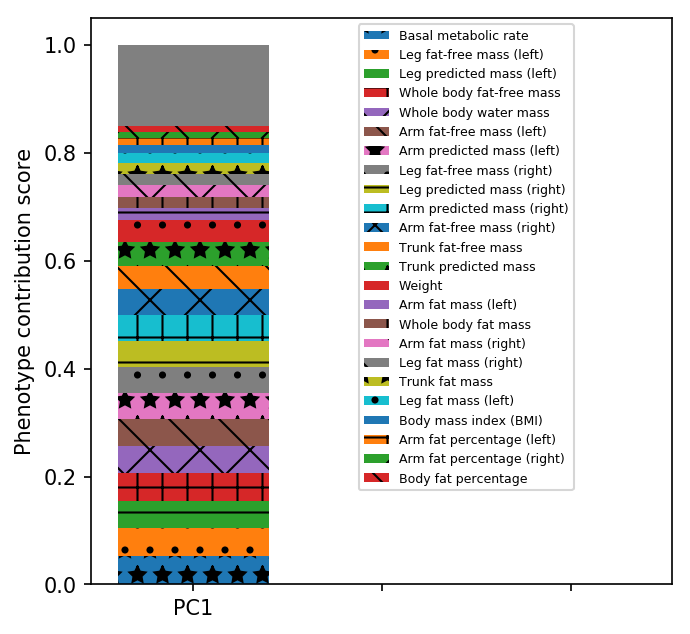

PC2


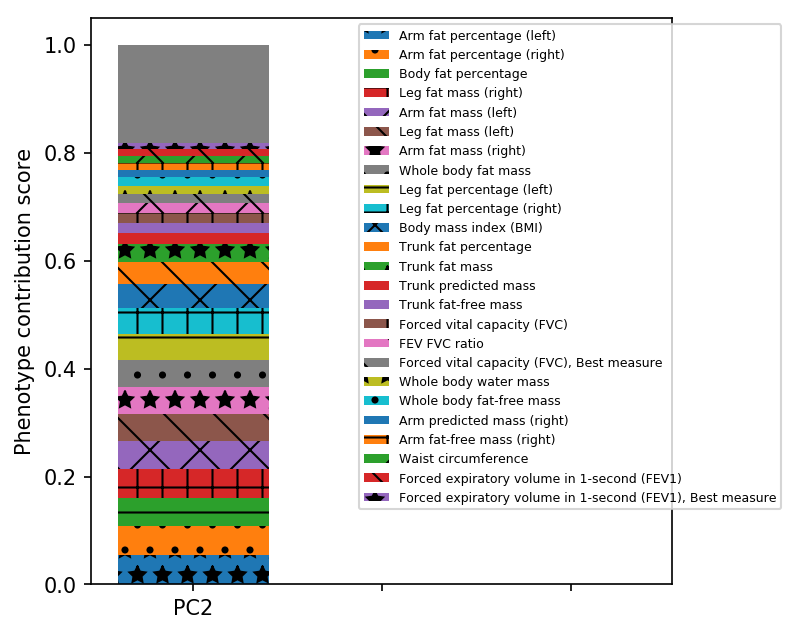

PC3


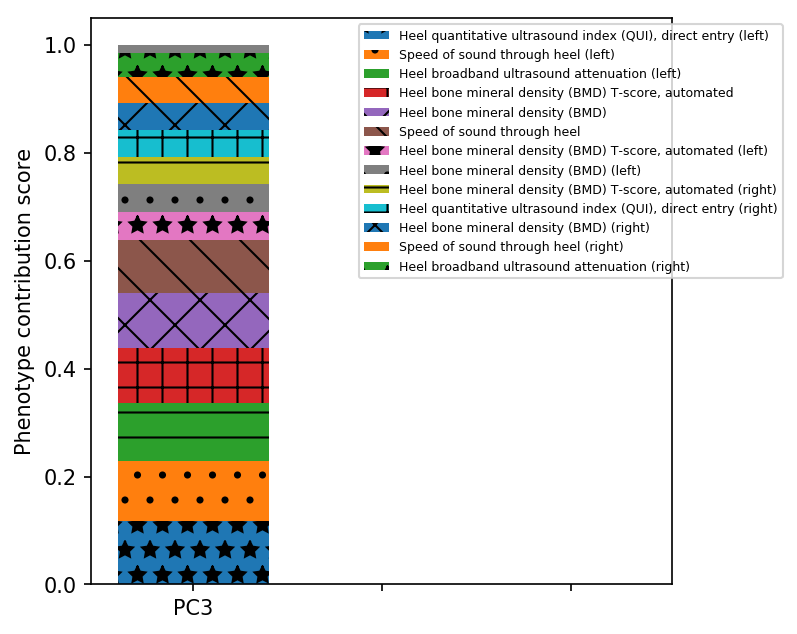

PC4


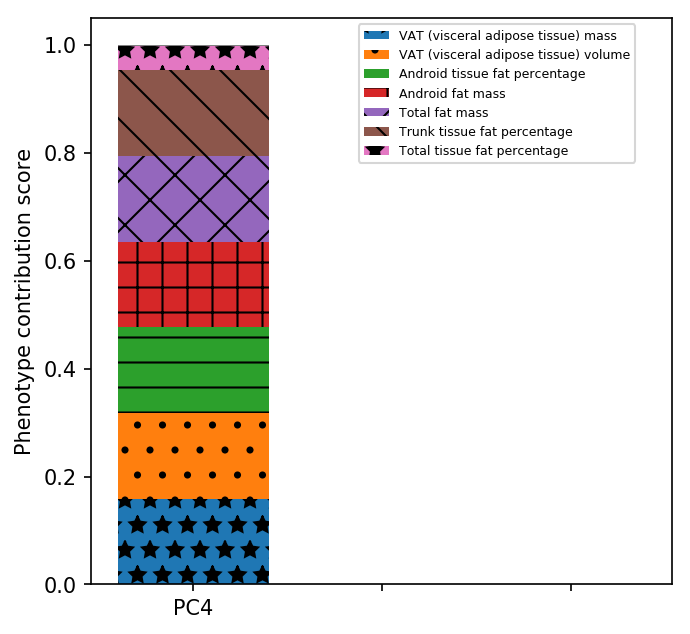

PC5


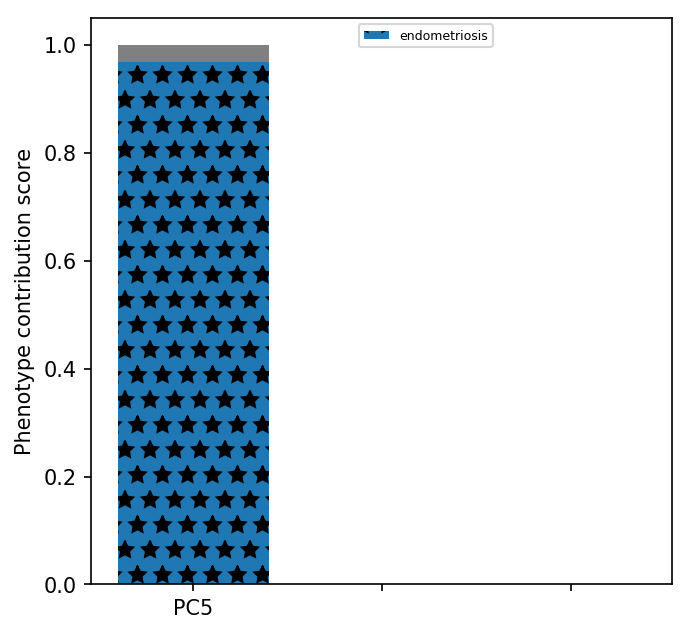

PC6


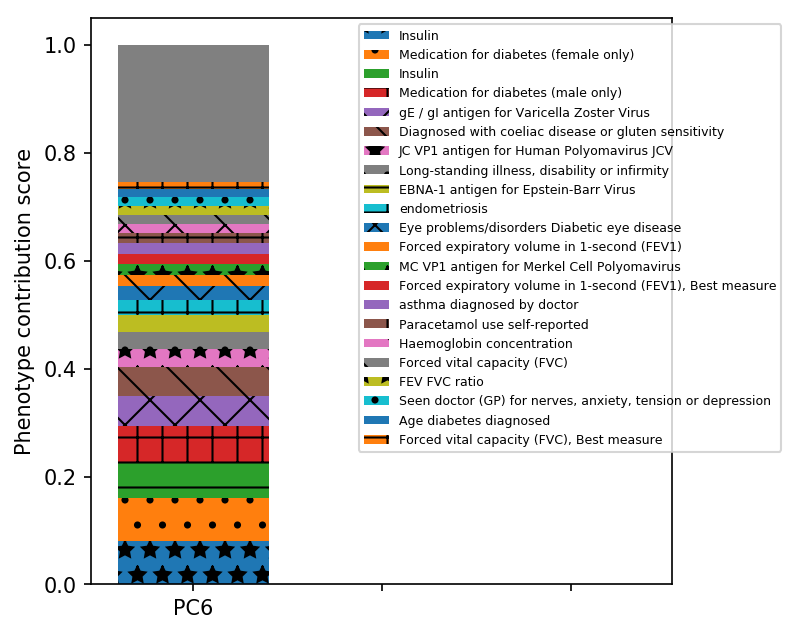

PC7


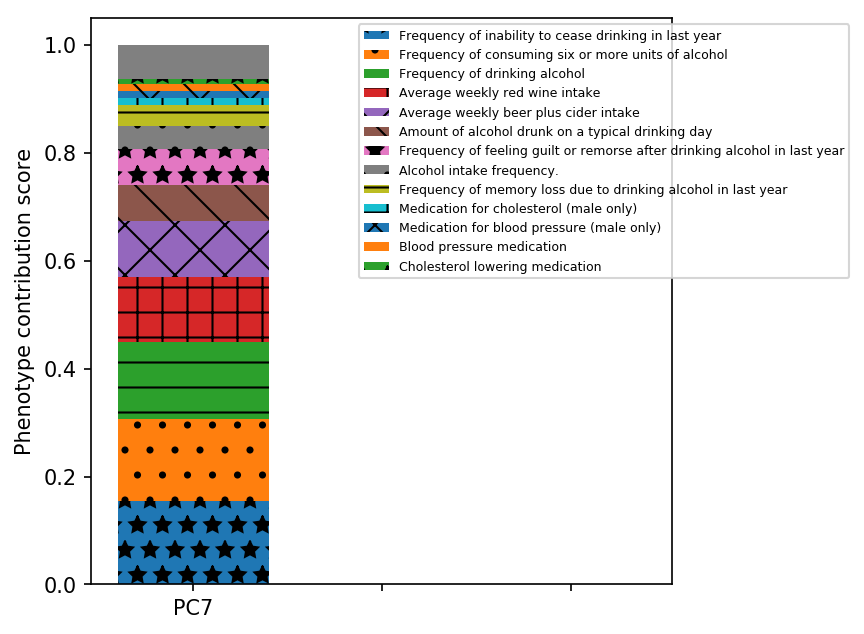

PC8


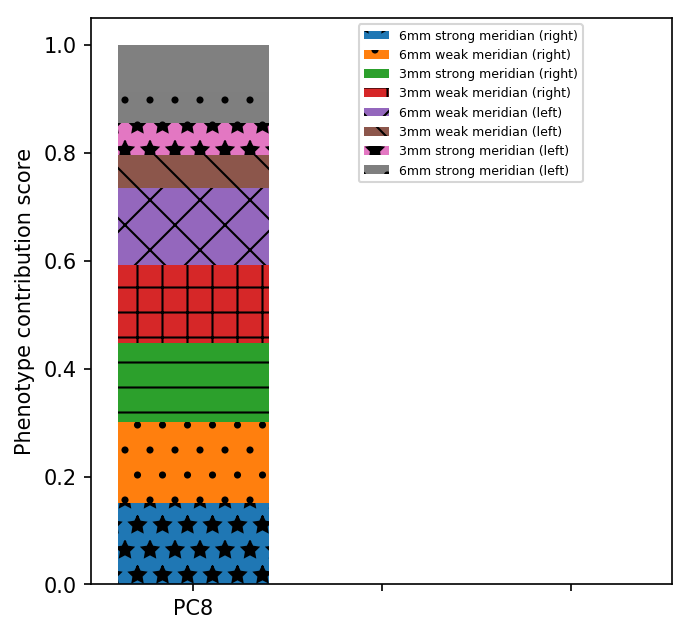

PC9


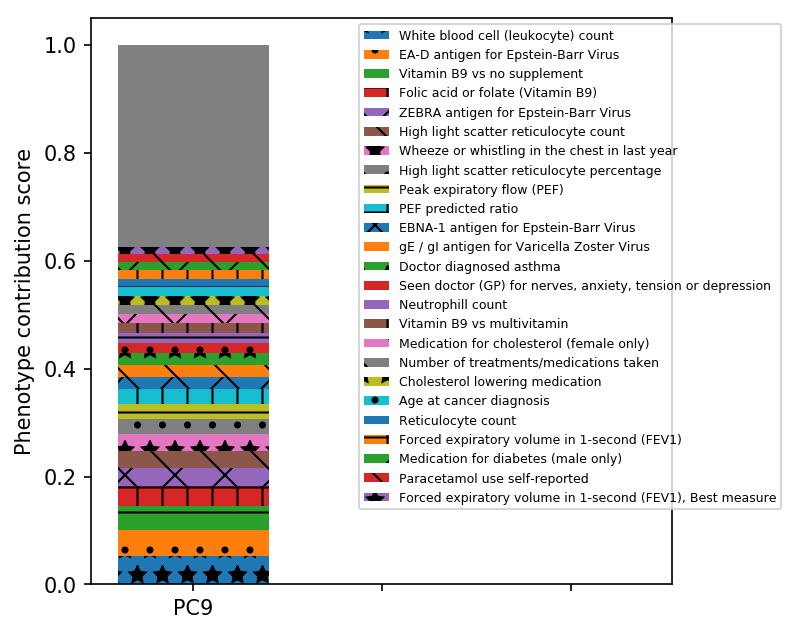

PC10


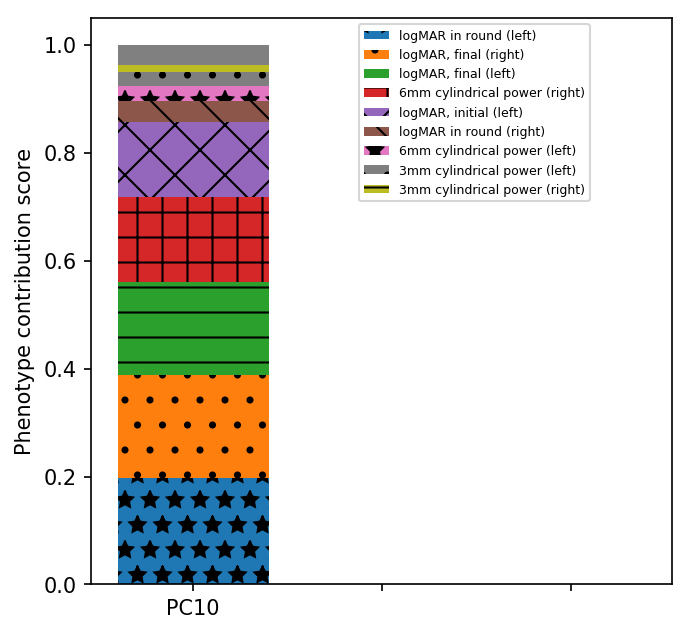

PC11


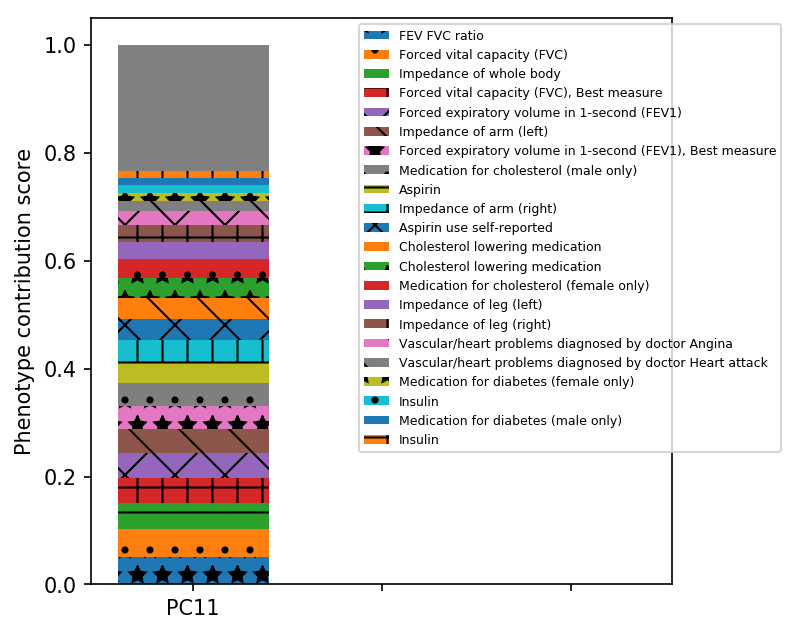

PC12


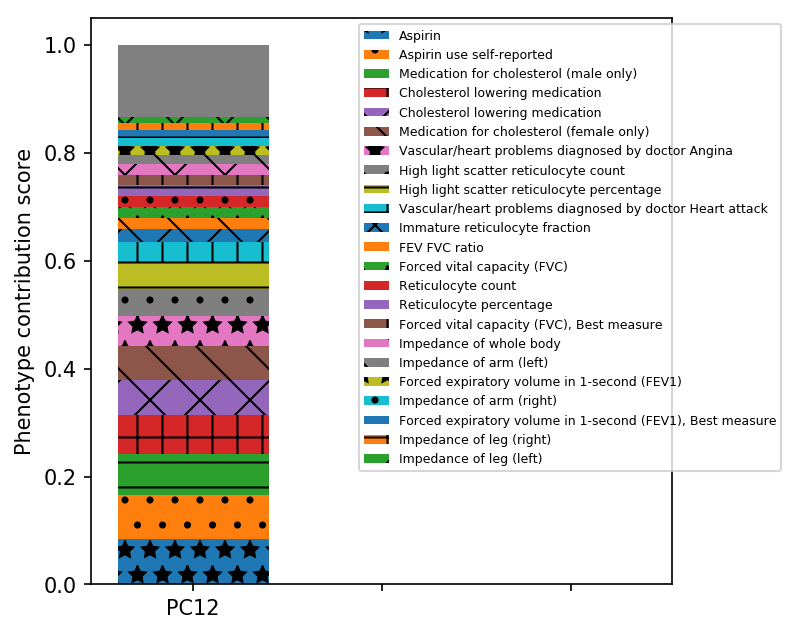

PC13


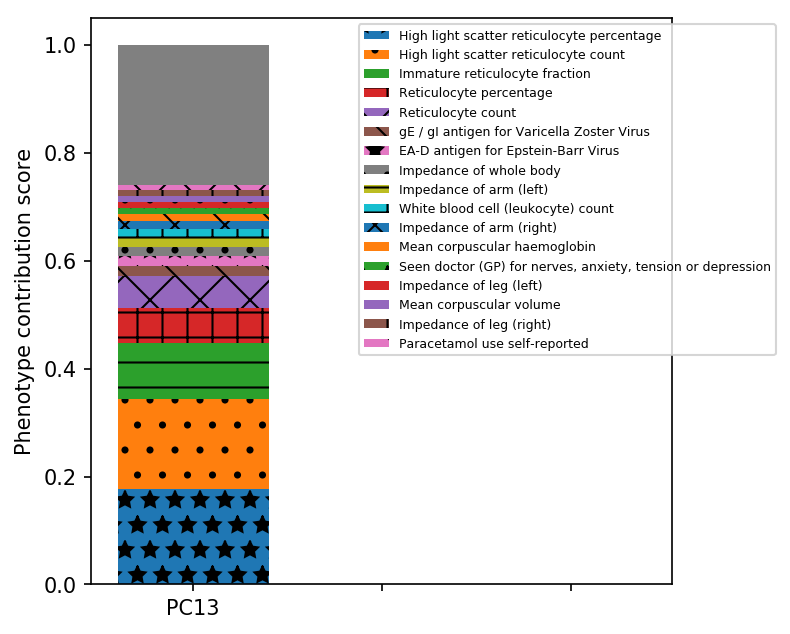

PC14


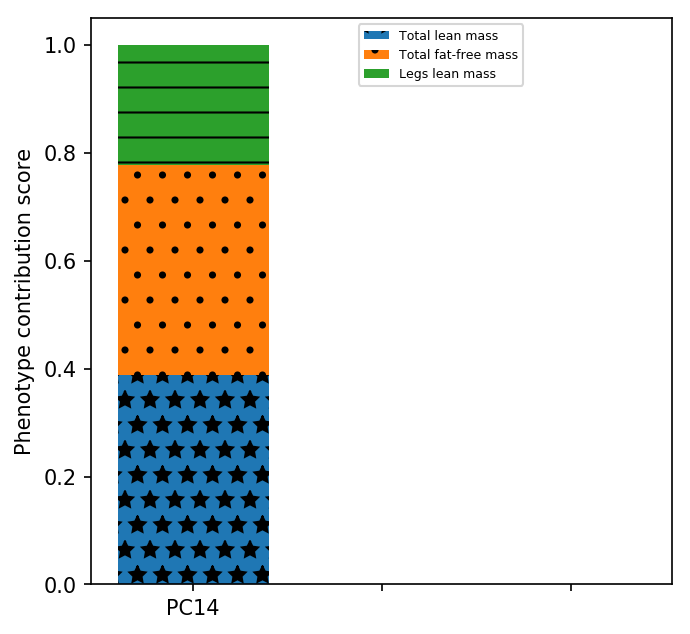

PC15


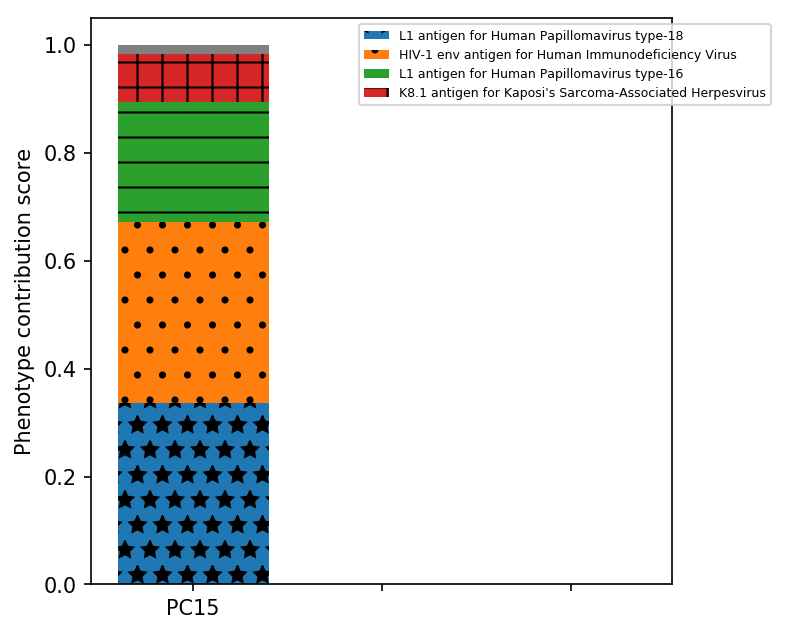

PC16


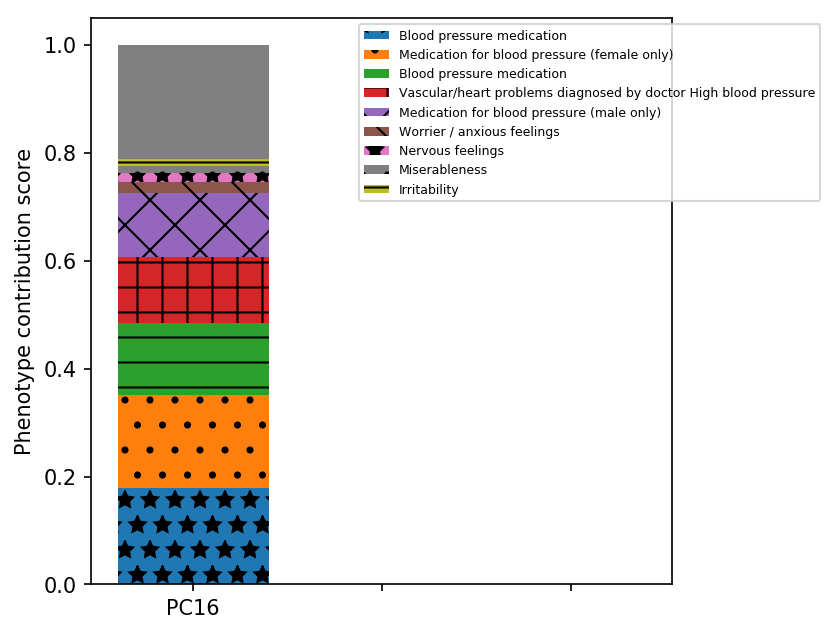

PC17


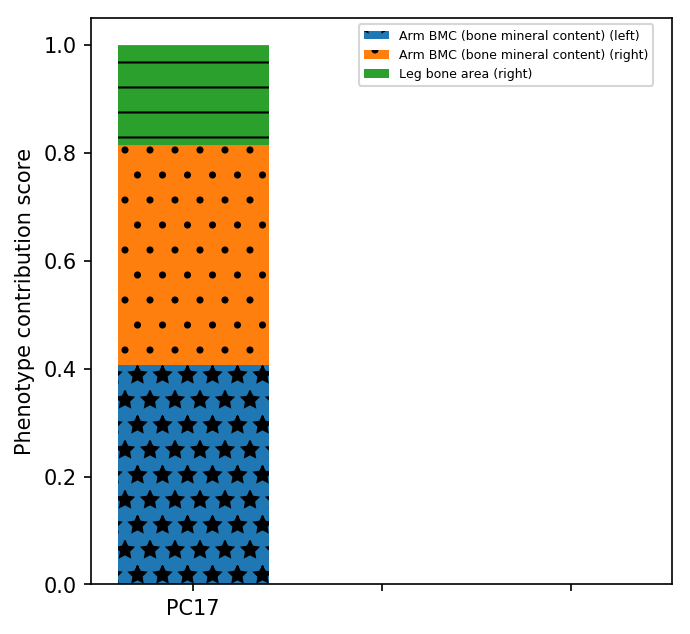

PC18


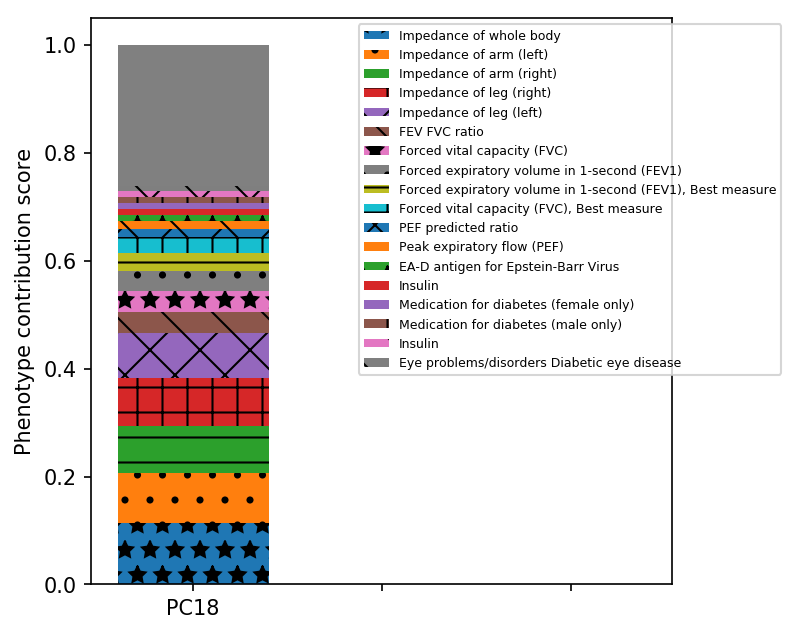

PC19


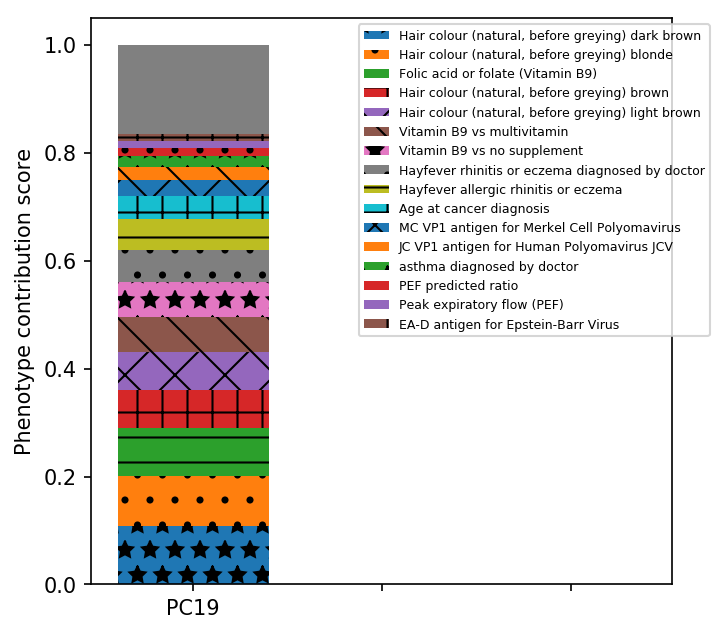

PC20


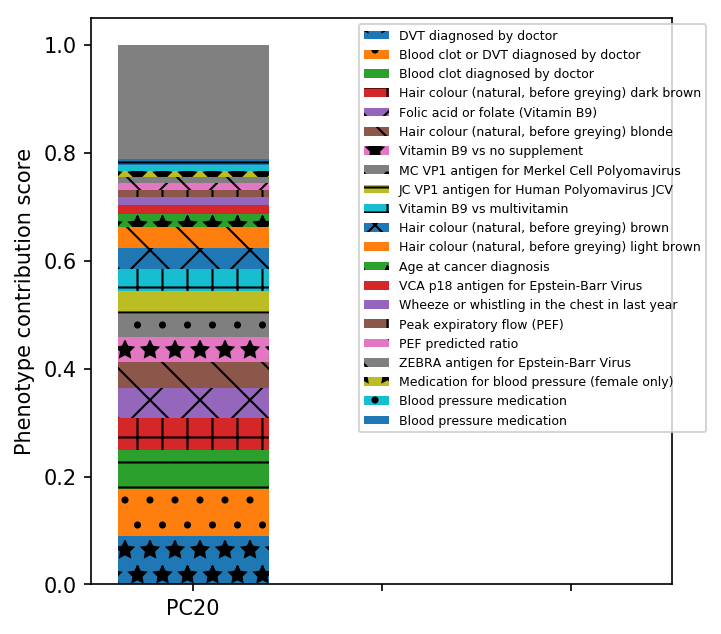

PC21


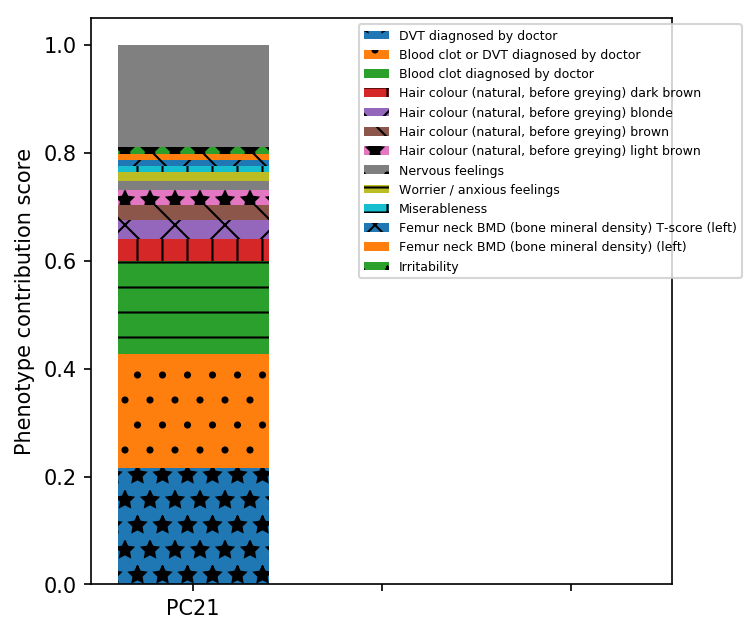

PC22


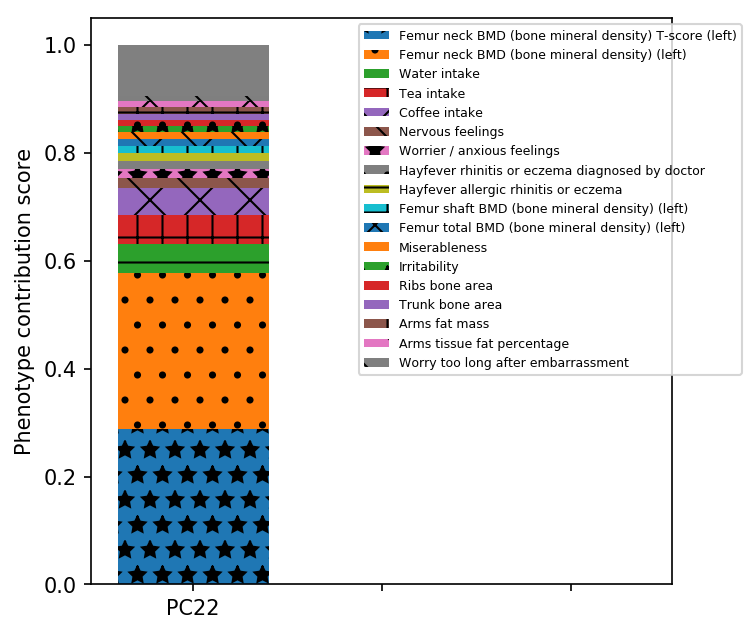

PC23


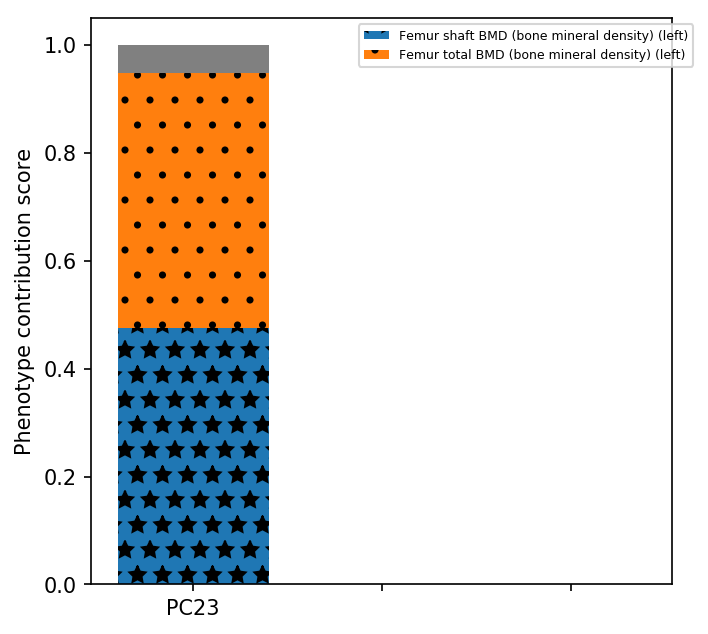

PC24


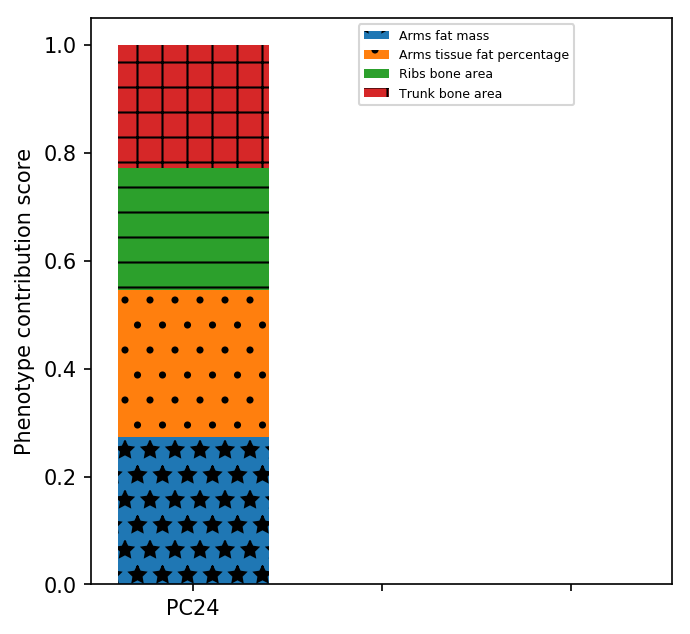

PC25


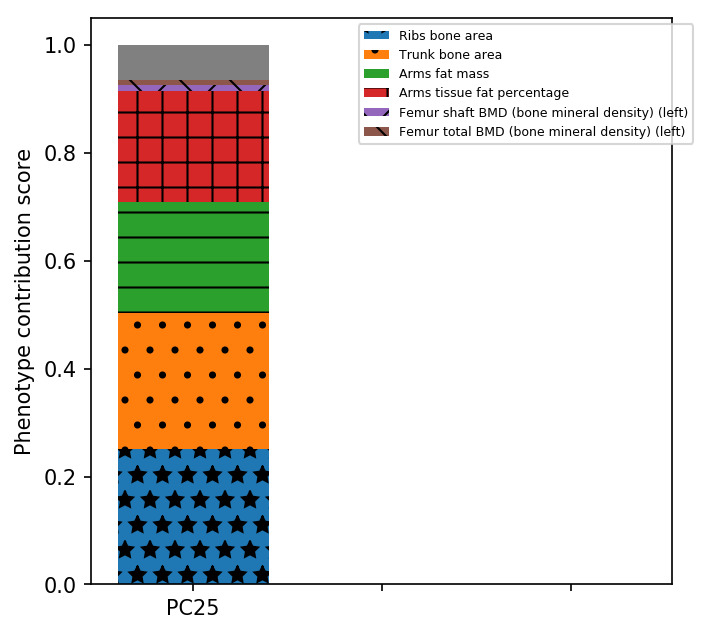

PC26


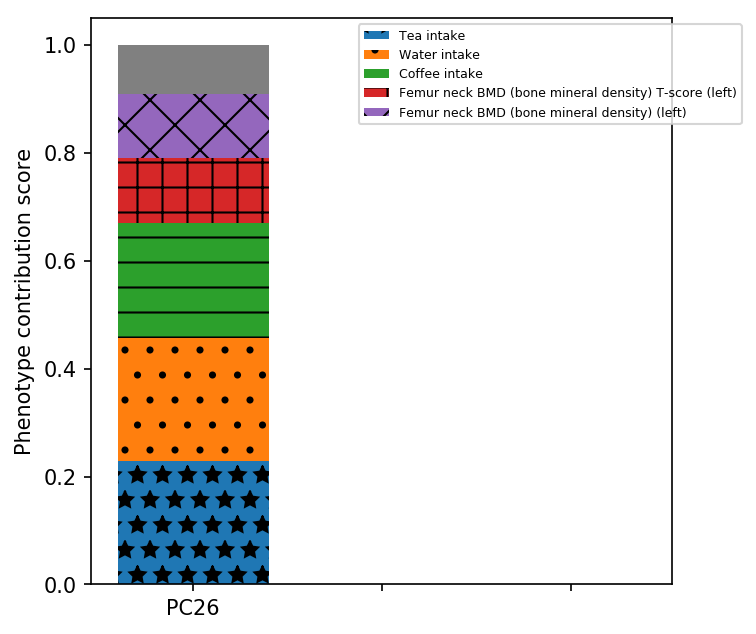

PC27


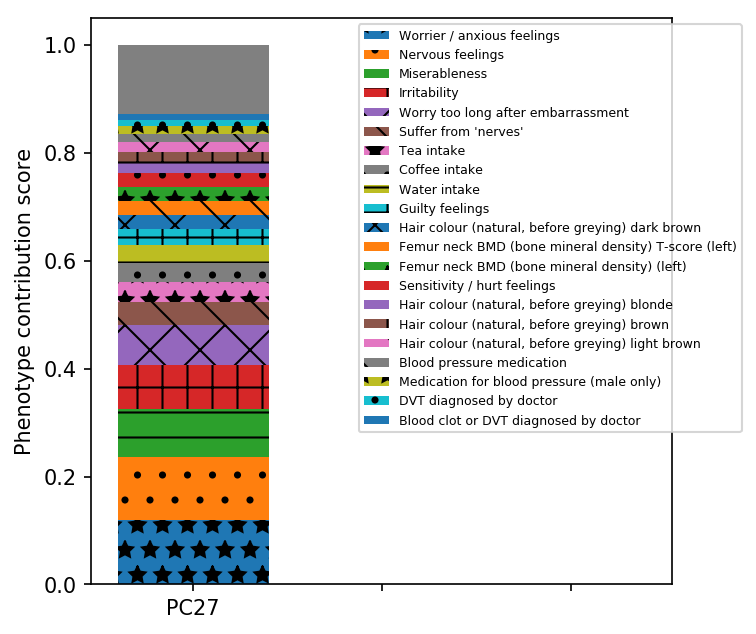

PC28


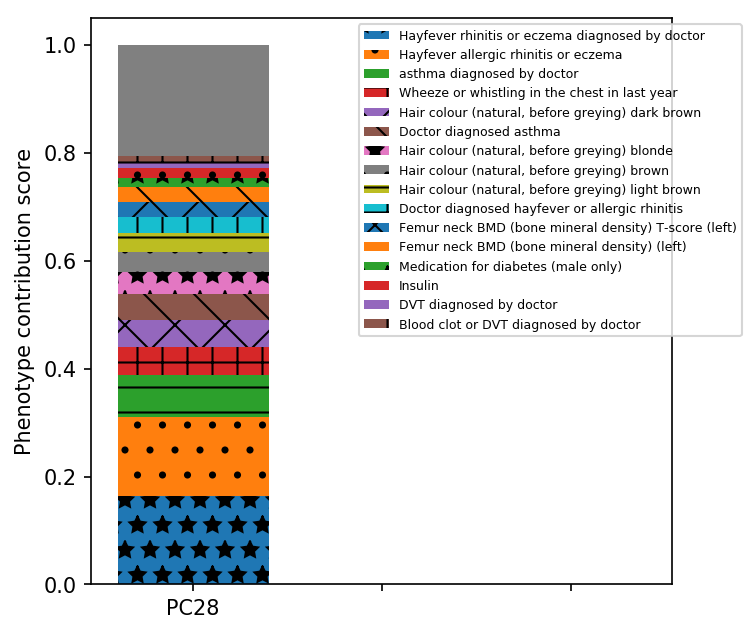

PC29


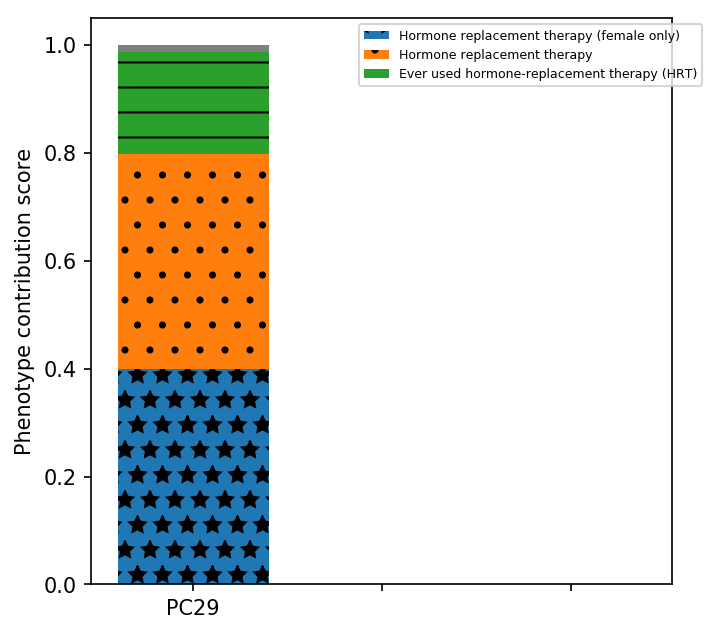

PC30


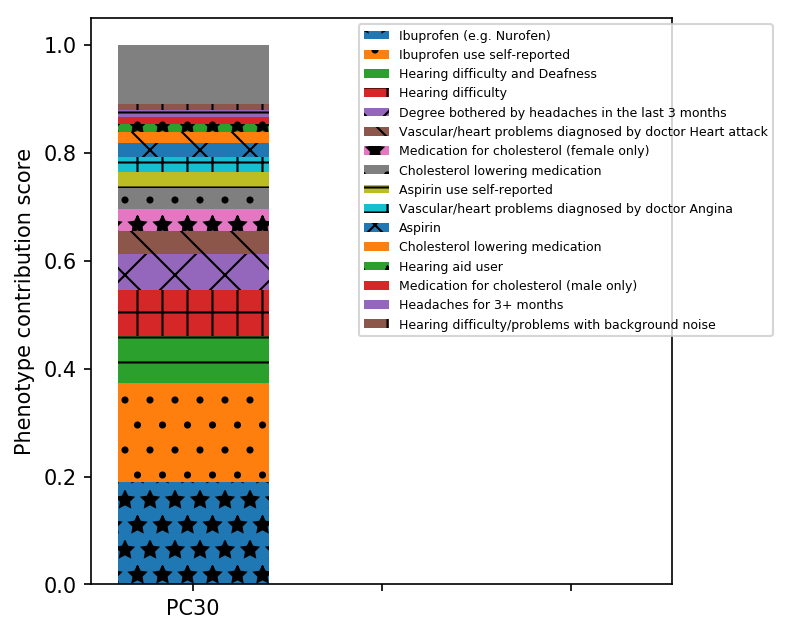

PC31


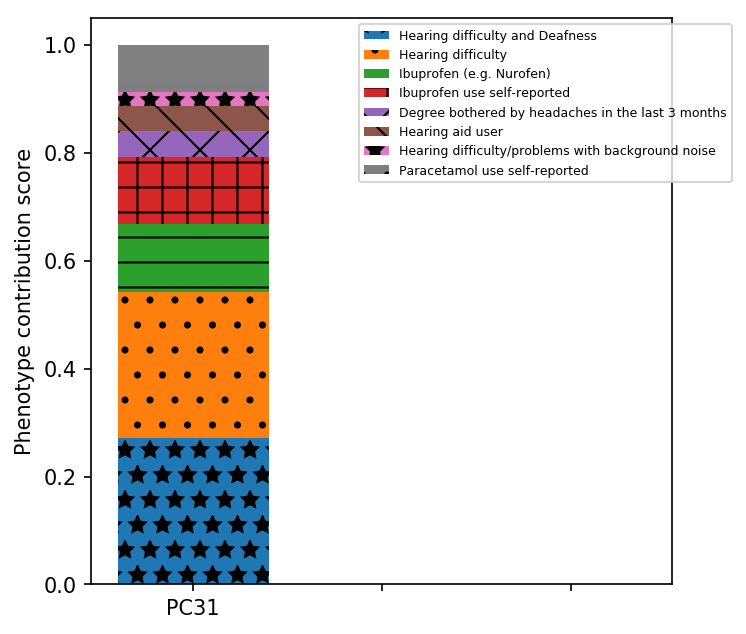

PC32


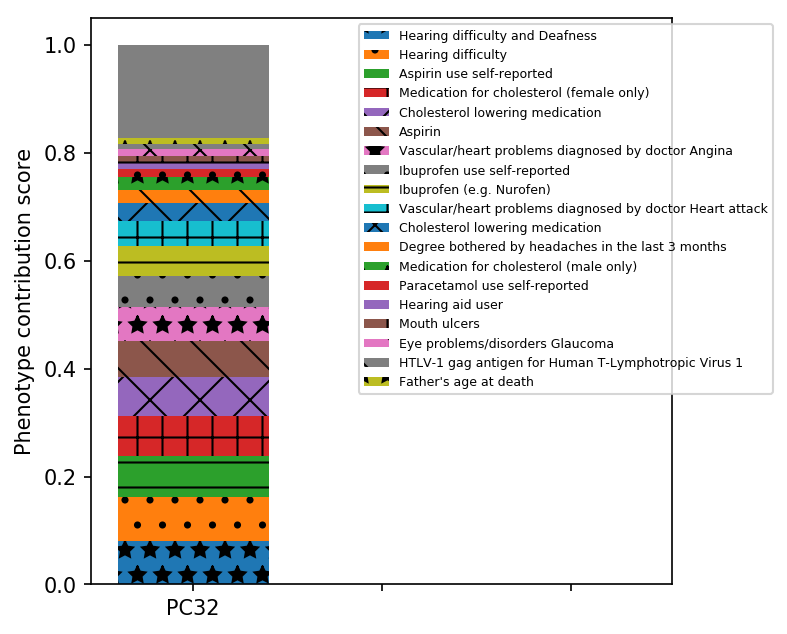

PC33


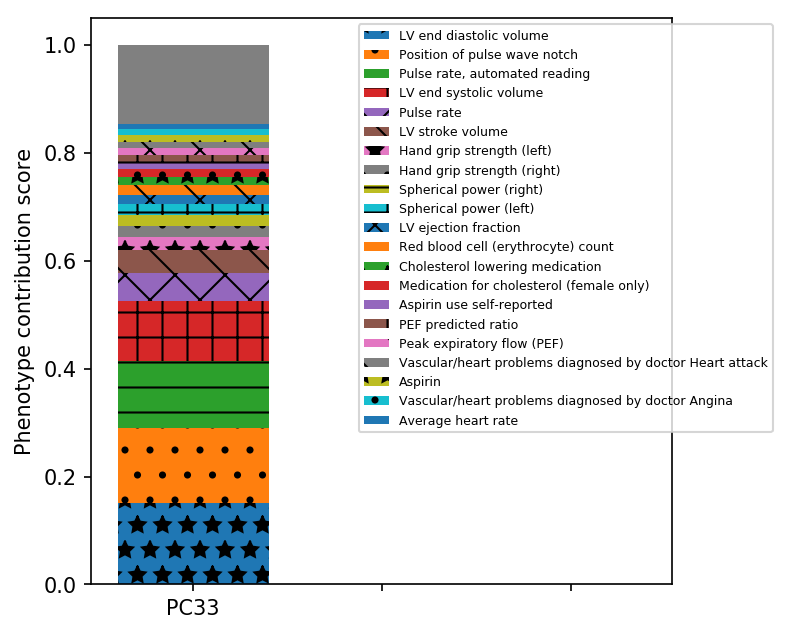

PC34


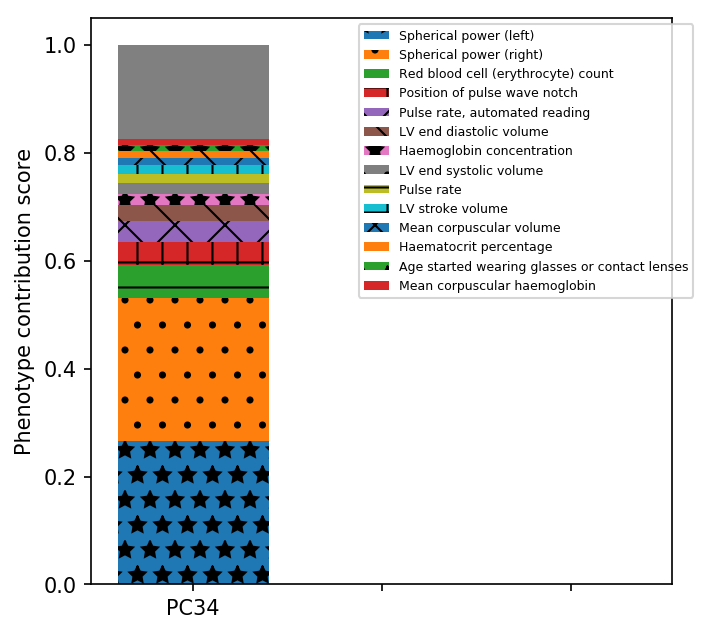

PC35


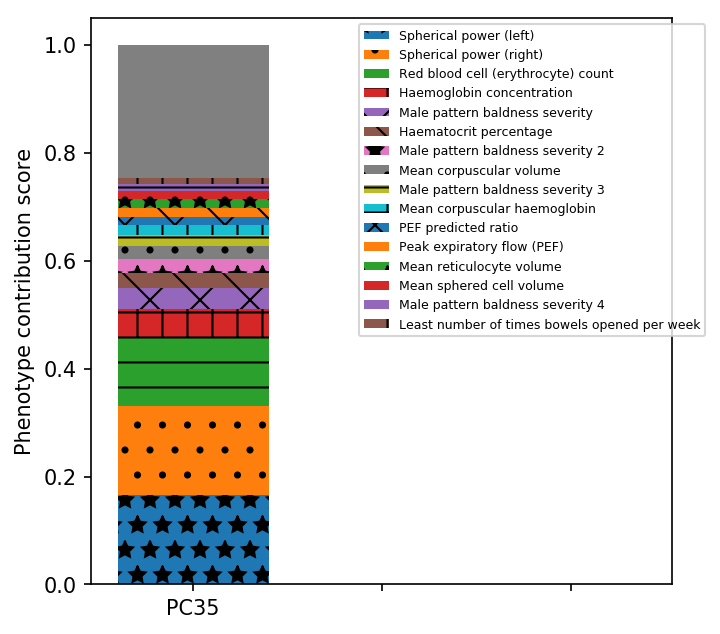

PC36


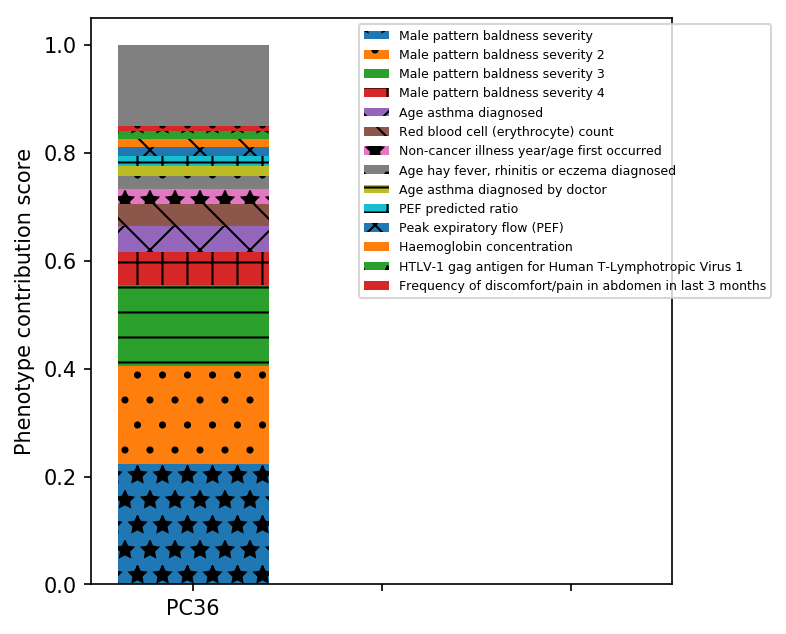

PC37


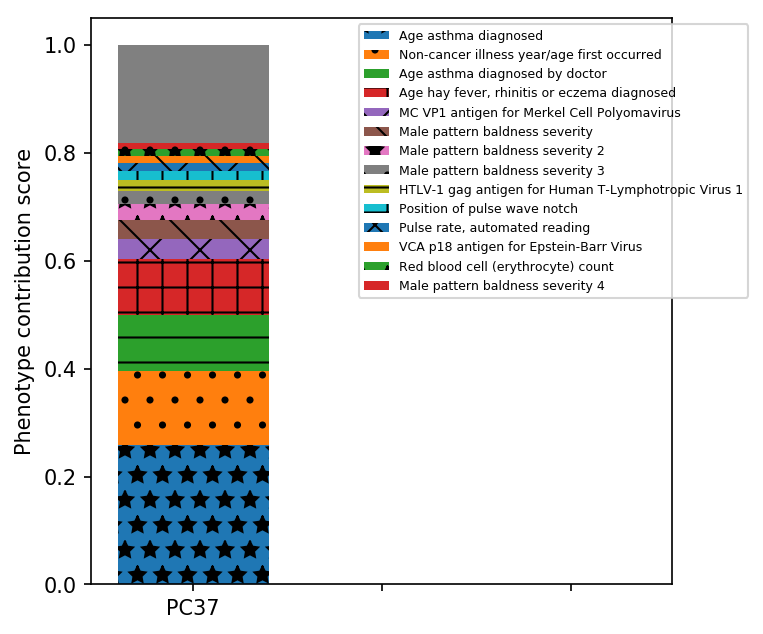

PC38


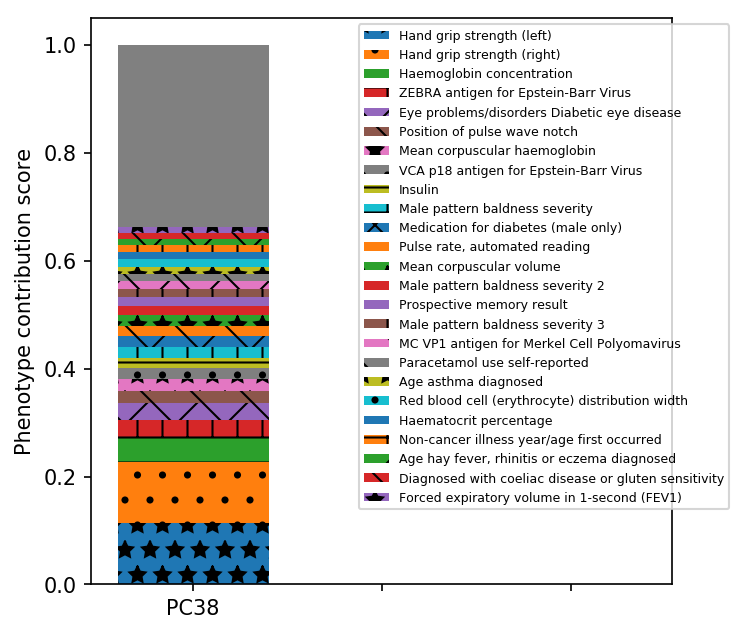

PC39


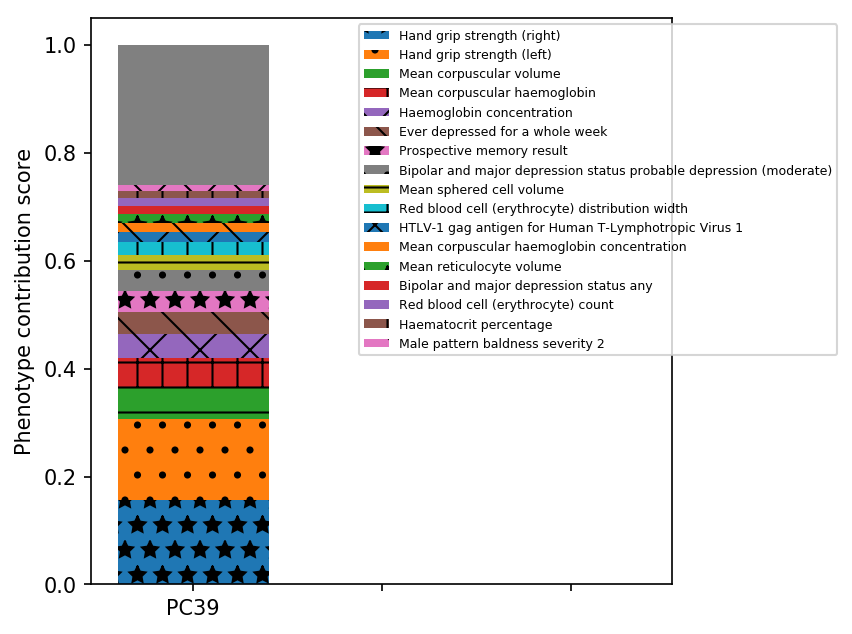

PC40


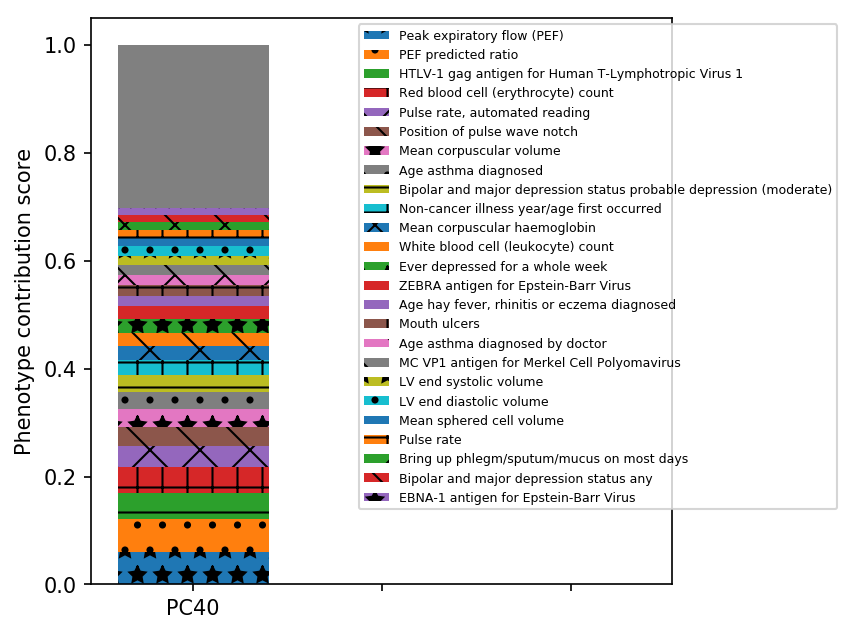

PC41


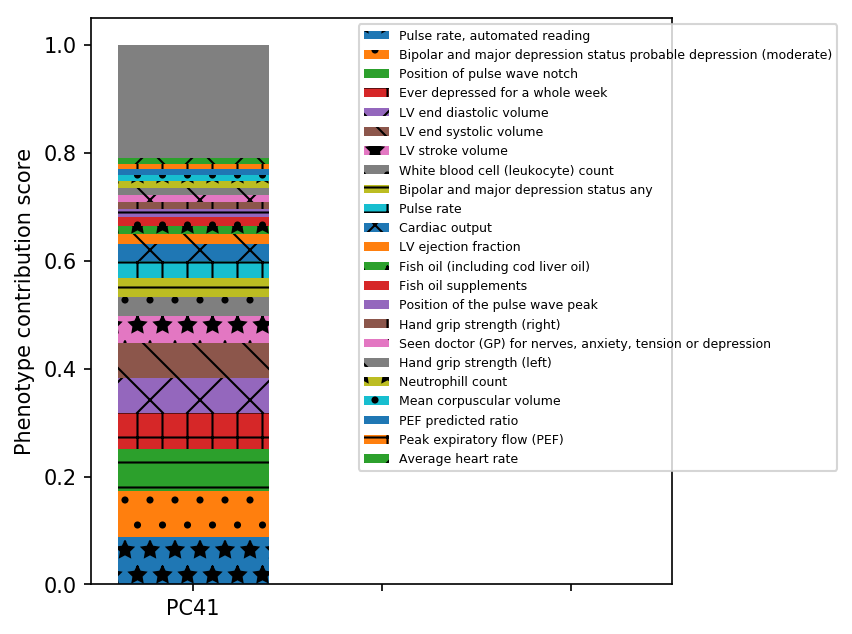

PC42


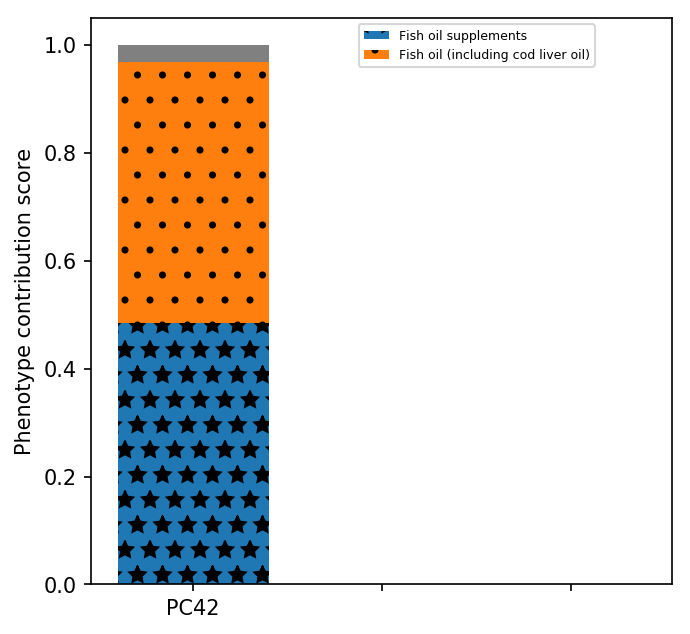

PC43


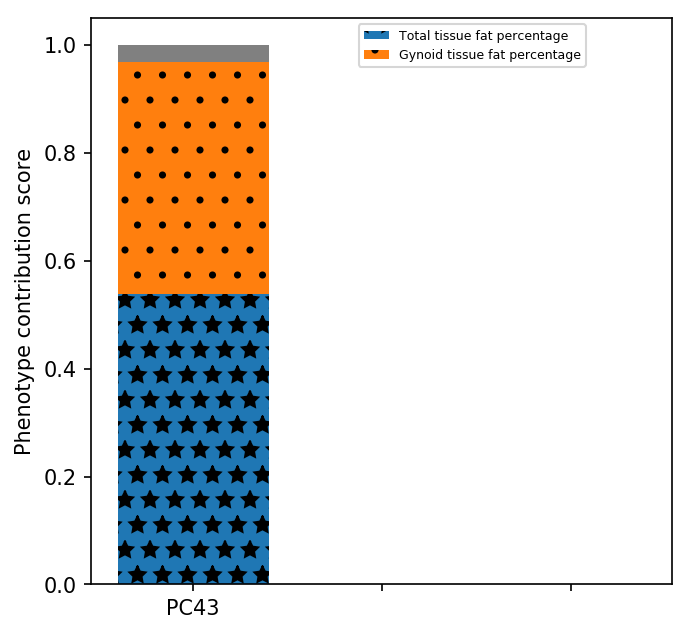

PC44


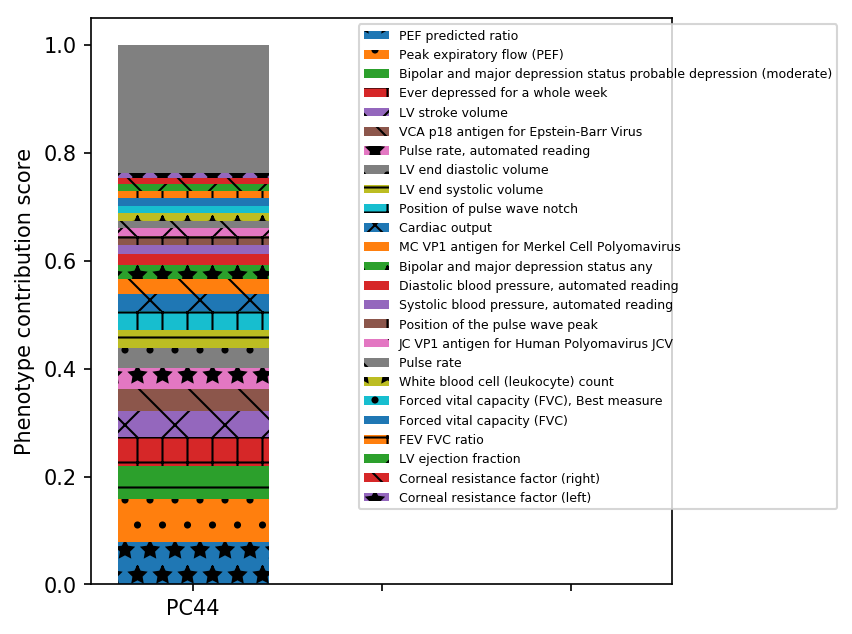

PC45


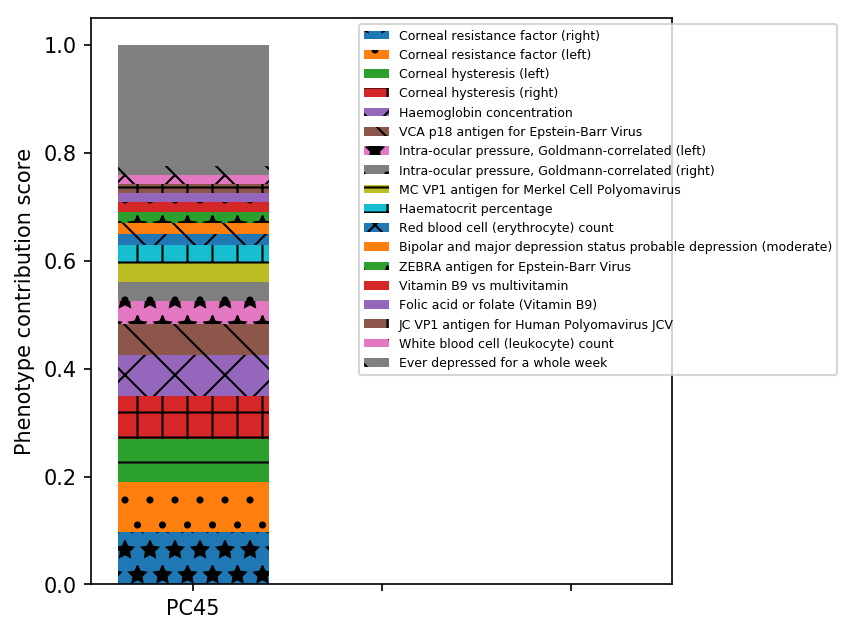

PC46


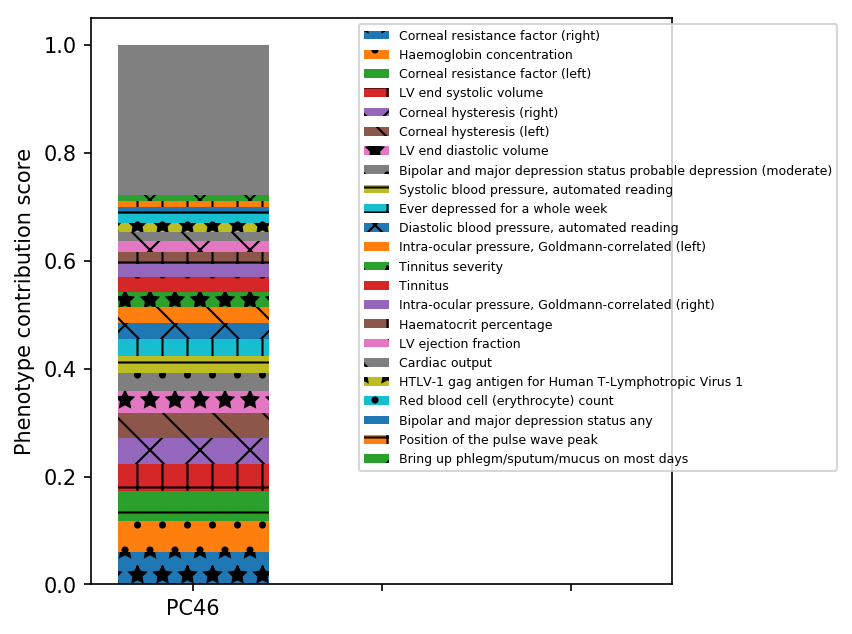

PC47


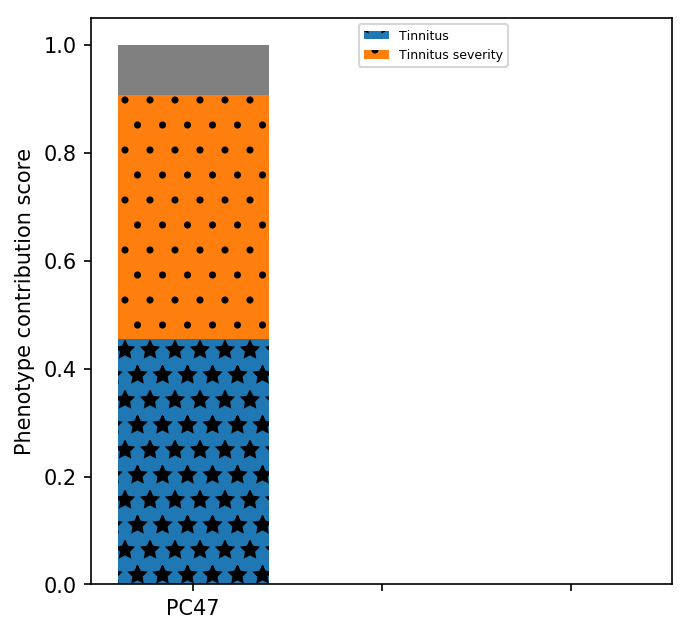

PC48


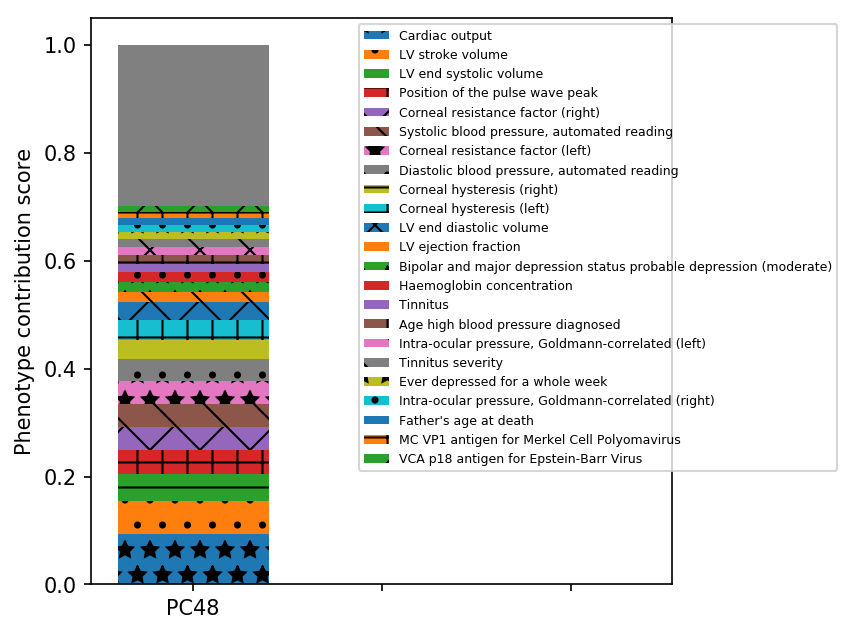

PC49


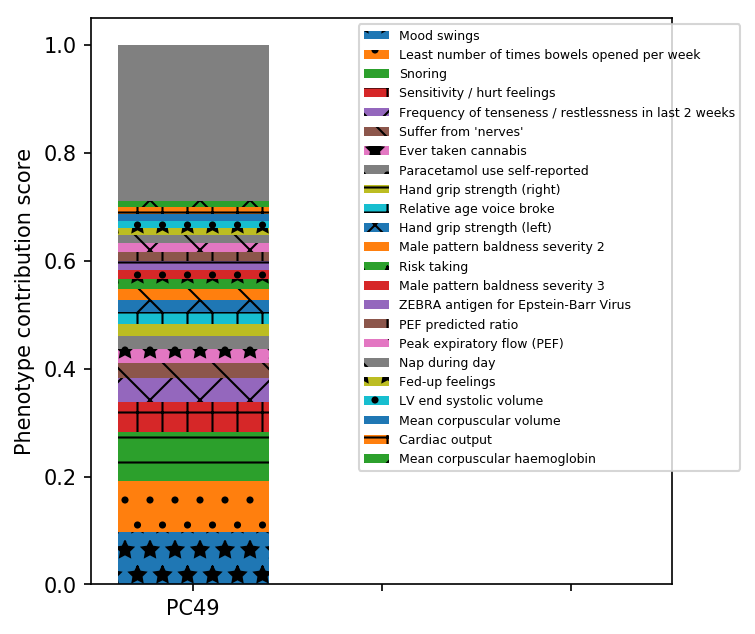

PC50


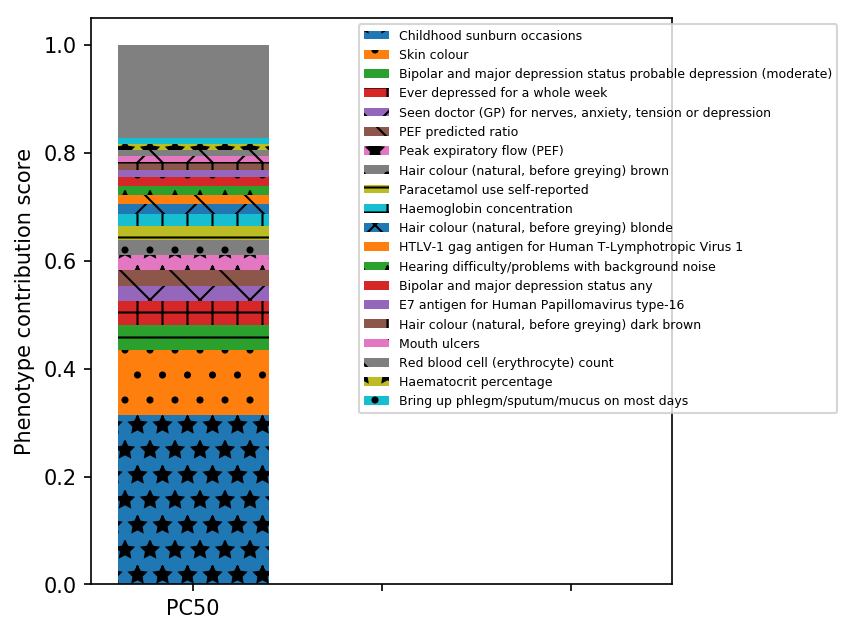

PC51
PC52
PC53
PC54
PC55
PC56
PC57
PC58
PC59
PC60
PC61
PC62
PC63
PC64
PC65
PC66
PC67
PC68
PC69
PC70
PC71
PC72
PC73
PC74
PC75
PC76
PC77
PC78
PC79
PC80
PC81
PC82
PC83
PC84
PC85
PC86
PC87
PC88
PC89
PC90
PC91
PC92
PC93
PC94
PC95
PC96
PC97
PC98
PC99
PC100
PC101
PC102
PC103
PC104
PC105
PC106
PC107
PC108
PC109
PC110
PC111
PC112
PC113
PC114
PC115
PC116
PC117
PC118
PC119
PC120
PC121
PC122
PC123
PC124
PC125
PC126
PC127
PC128
PC129
PC130
PC131
PC132
PC133
PC134
PC135
PC136
PC137
PC138
PC139
PC140
PC141
PC142
PC143
PC144
PC145
PC146
PC147
PC148
PC149
PC150
PC151
PC152
PC153
PC154
PC155
PC156
PC157
PC158
PC159
PC160
PC161
PC162
PC163
PC164
PC165
PC166
PC167
PC168
PC169
PC170
PC171
PC172
PC173
PC174
PC175
PC176
PC177
PC178
PC179
PC180
PC181
PC182
PC183
PC184
PC185
PC186
PC187
PC188
PC189
PC190
PC191
PC192
PC193
PC194
PC195
PC196
PC197
PC198
PC199
PC200
PC201
PC202
PC203
PC204
PC205
PC206
PC207
PC208
PC209
PC210
PC211
PC212
PC213
PC214
PC215
PC216
PC217
PC218
PC219
PC220
PC221
PC222
PC223
PC224
PC225

In [3]:
patterns = ('-', '+', 'x', '\\', '*', '.')
for pc in range(npc):
    print('PC'+str(pc+1))
    plt.figure(figsize=(5,5), dpi=150)
    ranked_pcs=np.argsort(z['V'][:,pc]**2)[::-1]
    for ix,phe_ix in enumerate(ranked_pcs):
        if (z['V'][phe_ix,pc]**2)/np.sum(z['V'][:,pc]**2) > 0.01 and ix < 25:
            plt.bar(list(range(3)),
                    [(z['V'][phe_ix,pc]**2)/np.sum(z['V'][:,pc]**2),0,0], 
                    bottom=np.sum(z['V'][ranked_pcs[:ix],pc]**2),
                    label=code2phe[z['label_phe_code'][phe_ix]].replace('_',' '),
                    hatch=patterns[(ix + 4) % len(patterns) ]
                   )
        else:
            plt.bar(list(range(3)),
                    [1-(np.sum(z['V'][ranked_pcs[:ix],pc]**2)/np.sum(z['V'][:,pc]**2)),0,0],
                    bottom=np.sum(z['V'][ranked_pcs[:ix],pc]**2)/np.sum(z['V'][:,pc]**2), 
                    color='grey')
            plt.xticks(list(range(3)), ['PC{}'.format(pc+1),'',''])
            plt.ylabel('Phenotype contribution score')
            lgd=plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(0.45, 1))
            break
    plt.savefig('pdfs/phe_pc{}.pdf'.format(pc+1), bbox_extra_artists=(lgd,), bbox_inches='tight')
    if pc < 50:
        plt.show()
    else:
        plt.close()